In [1]:
import numpy as np
import scipy as sp
import scipy.linalg
import scipy.sparse
import matplotlib.pyplot as plt

import tkmath

ModuleNotFoundError: No module named 'tkmath'

In [52]:
def norm_adj(A):
    n = A.shape[0]
    return (2 * A - np.ones((n, n)) + np.eye(n)) / np.sqrt(n)

def L(A, a, b):
    n = A.shape[0]
    A_norm = norm_adj(A)
    
    D = np.diag(np.tanh((A @ np.ones(n) - np.ones(n) * n / 2) / np.sqrt(n) / a) * a)

    L = b * D + A_norm
    
    return L

def power_iter(X, iters=100, tol=1e-6):
    n = X.shape[0]
    b = np.random.normal(size=n)
    b = b / np.linalg.norm(b)
    b_val = b.T @ X @ b
    
    for ix in range(iters):
        bnew = X @ b
        bnew = bnew / np.linalg.norm(bnew)
        bnew_val = bnew.T @ X @ bnew
        
        if abs(b_val - bnew_val) < tol:
            break
            
        b = bnew
        b_val = bnew_val
        
    return b_val

In [87]:
max_eval_fn = lambda X: np.max(np.linalg.eigvalsh(X))
# max_eval_fn = lambda X: sp.linalg.eigvalsh(X, subset_by_index=[X.shape[0] - 1, X.shape[0] - 1])[0]
# max_eval_fn = lambda X: sp.sparse.linalg.eigs(X, k=1, which='LM')
# max_eval_fn = power_iter

c = 0.9
a = 1.0
b = 1.0

ns = np.arange(100, 5100, 100)

trials = 100

valuess_direct_null = []
valuess_direct_planted = []

valuess_Lap_null = []
valuess_Lap_planted = []

for n in ns:
    print(n)
    k = int(c * np.sqrt(n))
    
    values_direct_null = []
    values_direct_planted = []
    values_Lap_null = []
    values_Lap_planted = []
    
    for ix in range(trials):
        if ix % 10 == 0:
            print('  ', ix)
        
        A = tkmath.graphs.random.erdos_renyi(n, 0.5)
        values_direct_null.append(max_eval_fn(norm_adj(A)))
        values_Lap_null.append(max_eval_fn(L(A, a, b)))
        
        A = tkmath.graphs.random.planted_clique(n, 0.5, k)
        values_direct_planted.append(max_eval_fn(norm_adj(A)))
        values_Lap_planted.append(max_eval_fn(L(A, a, b)))
        
    valuess_Lap_null.append(values_Lap_null)
    valuess_Lap_planted.append(values_Lap_planted)
    valuess_direct_null.append(values_direct_null)
    valuess_direct_planted.append(values_direct_planted)

100
   0
   10
   20
   30
   40
   50
   60
   70
   80
   90
200
   0
   10
   20
   30
   40
   50
   60
   70
   80
   90
300
   0
   10
   20
   30
   40
   50
   60
   70
   80
   90
400
   0
   10
   20
   30
   40
   50
   60
   70
   80
   90
500
   0
   10
   20
   30
   40
   50
   60
   70
   80
   90
600
   0
   10
   20
   30
   40
   50
   60
   70
   80
   90
700
   0
   10
   20
   30
   40
   50
   60
   70
   80
   90
800
   0
   10
   20
   30
   40
   50
   60
   70
   80
   90
900
   0
   10
   20
   30
   40
   50
   60
   70
   80
   90
1000
   0
   10
   20
   30
   40
   50
   60
   70
   80
   90
1100
   0
   10
   20
   30
   40
   50
   60
   70
   80
   90
1200
   0
   10
   20
   30
   40
   50
   60
   70
   80
   90
1300
   0
   10
   20
   30
   40
   50
   60
   70
   80
   90
1400
   0
   10
   20
   30
   40
   50
   60
   70
   80
   90
1500
   0
   10
   20
   30
   40
   50
   60
   70
   80
   90
1600
   0
   10
   20
   30
   40
   50
   60
   

KeyboardInterrupt: 

In [88]:
ns = ns[:len(valuess_Lap_null)]

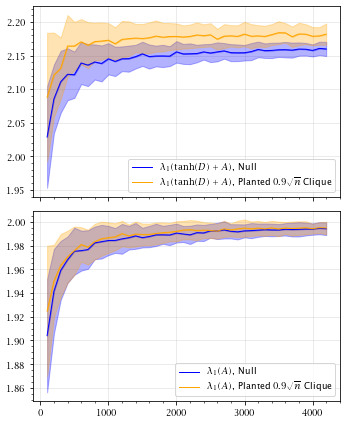

In [101]:
tkmath.mpl_util.init_latex()

fig, axes = plt.subplots(2, 1, figsize=(5, 6), sharex=True)

tkmath.mpl_util.layer_plot(axes[0], ns, valuess_Lap_null, color='blue', label='$\\lambda_1(\\tanh(D) + A)$, Null')
tkmath.mpl_util.layer_plot(axes[0], ns, valuess_Lap_planted, color='orange', label='$\\lambda_1(\\tanh(D) + A)$, Planted $0.9\\sqrt{n}$ Clique')
axes[0].legend(loc='lower right')

tkmath.mpl_util.layer_plot(axes[1], ns, valuess_direct_null, color='blue', label='$\\lambda_1(A)$, Null')
tkmath.mpl_util.layer_plot(axes[1], ns, valuess_direct_planted, color='orange', label='$\\lambda_1(A)$, Planted $0.9\\sqrt{n}$ Clique')
axes[1].legend(loc='lower right')

for ax in axes:
    tkmath.mpl_util.style_ax(ax)
    
plt.tight_layout()

plt.savefig('/home/tim/projects/gnn-planted-clique/img/eigvals-4k-simple-laplacian.pdf')

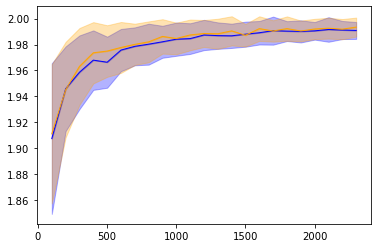

(array([ 1.,  0.,  2.,  0.,  6.,  4.,  3.,  9., 12., 13., 16., 19., 17.,
        24., 25., 26., 32., 33., 37., 38., 40., 43., 45., 44., 48., 45.,
        46., 43., 42., 40., 35., 33., 30., 28., 19., 15., 18., 15., 14.,
        12., 10.,  8.,  3.,  1.,  1.,  0.,  0.,  1.,  1.,  3.]),
 array([-7.9442873 , -7.61512334, -7.28595938, -6.95679542, -6.62763146,
        -6.29846751, -5.96930355, -5.64013959, -5.31097563, -4.98181168,
        -4.65264772, -4.32348376, -3.9943198 , -3.66515585, -3.33599189,
        -3.00682793, -2.67766397, -2.34850001, -2.01933606, -1.6901721 ,
        -1.36100814, -1.03184418, -0.70268023, -0.37351627, -0.04435231,
         0.28481165,  0.6139756 ,  0.94313956,  1.27230352,  1.60146748,
         1.93063144,  2.25979539,  2.58895935,  2.91812331,  3.24728727,
         3.57645122,  3.90561518,  4.23477914,  4.5639431 ,  4.89310705,
         5.22227101,  5.55143497,  5.88059893,  6.20976289,  6.53892684,
         6.8680908 ,  7.19725476,  7.52641872,  7.85558267,

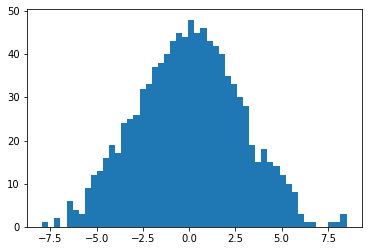

In [13]:
plt.hist(np.linalg.eigvalsh(L), bins=50)